## Multi classification problem using pytorch
### Datasets from sklearn (wine)
#### Each wine has 13 features which are 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline' and can be classified into 3 types.

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import random
import torch
from torch import nn
loaded_data = datasets.load_wine()
data_X = loaded_data.data
data_Y = loaded_data.target
print(loaded_data.feature_names,"\n",loaded_data.target_names)
data_X = torch.from_numpy(data_X)
data_Y = torch.from_numpy(data_Y)
data_Y = data_Y.type(torch.long)
#print(data_X)
print(data_X)
#print(train_data_X,"\n",test_data_X)
input_size = data_X.shape[1]
output_size = 3
print(data_Y.type)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 
 ['class_0' 'class_1' 'class_2']
tensor([[1.4230e+01, 1.7100e+00, 2.4300e+00,  ..., 1.0400e+00, 3.9200e+00,
         1.0650e+03],
        [1.3200e+01, 1.7800e+00, 2.1400e+00,  ..., 1.0500e+00, 3.4000e+00,
         1.0500e+03],
        [1.3160e+01, 2.3600e+00, 2.6700e+00,  ..., 1.0300e+00, 3.1700e+00,
         1.1850e+03],
        ...,
        [1.3270e+01, 4.2800e+00, 2.2600e+00,  ..., 5.9000e-01, 1.5600e+00,
         8.3500e+02],
        [1.3170e+01, 2.5900e+00, 2.3700e+00,  ..., 6.0000e-01, 1.6200e+00,
         8.4000e+02],
        [1.4130e+01, 4.1000e+00, 2.7400e+00,  ..., 6.1000e-01, 1.6000e+00,
         5.6000e+02]], dtype=torch.float64)
<built-in method type of Tensor object at 0x0000020E90210040>


In [3]:
train_num = 120
index = random.sample(range(0,178), train_num)
a = list(range(0,178))
for i in index:
    a.remove(i)
print(index)
print(a)

[148, 14, 164, 176, 171, 124, 9, 170, 59, 53, 1, 13, 126, 46, 165, 90, 73, 149, 17, 84, 81, 100, 166, 135, 80, 47, 95, 4, 119, 144, 112, 34, 130, 122, 42, 15, 22, 132, 0, 44, 32, 163, 88, 107, 63, 54, 16, 3, 21, 121, 64, 26, 146, 25, 160, 140, 37, 10, 65, 116, 157, 97, 174, 138, 5, 23, 168, 162, 93, 150, 131, 41, 113, 20, 86, 109, 141, 94, 91, 158, 98, 175, 111, 70, 118, 38, 35, 127, 139, 11, 159, 106, 6, 7, 66, 58, 62, 173, 36, 49, 61, 60, 27, 69, 110, 18, 167, 161, 96, 76, 136, 103, 74, 153, 82, 29, 31, 8, 33, 68]
[2, 12, 19, 24, 28, 30, 39, 40, 43, 45, 48, 50, 51, 52, 55, 56, 57, 67, 71, 72, 75, 77, 78, 79, 83, 85, 87, 89, 92, 99, 101, 102, 104, 105, 108, 114, 115, 117, 120, 123, 125, 128, 129, 133, 134, 137, 142, 143, 145, 147, 151, 152, 154, 155, 156, 169, 172, 177]


#### torch.index_select can select special index contant in a torch tensor

In [4]:
train_data_X = torch.index_select(data_X, 0, torch.tensor(index))
train_data_Y = torch.index_select(data_Y, 0, torch.tensor(index))
test_data_X = torch.index_select(data_X, 0, torch.tensor(a))
test_data_Y = torch.index_select(data_Y, 0, torch.tensor(a))
print(train_data_X.shape,train_data_Y.shape,test_data_X.shape,test_data_Y.shape)
print(train_data_Y)

torch.Size([120, 13]) torch.Size([120]) torch.Size([58, 13]) torch.Size([58])
tensor([2, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2,
        1, 0, 1, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0,
        1, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0,
        1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 1])


In [5]:
# inherit nn.Module
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.layer1 = nn.Linear(13,10)
        self.layer2 = nn.Linear(10,3)
    def forward(self,x):
        y = self.layer1(x)
        y = self.layer2(y)
        return y

In [6]:
net = Net()
net.double()
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [7]:
#train
net.double()
def train():
    train_l = 0.0
    y_hat = net(train_data_X)
    l = loss(y_hat, train_data_Y).sum()
    
    optimizer.zero_grad()

    l.backward()

    optimizer.step()
    train_l = l
    print('epoch %d, loss %.4f' % (epoch + 1, train_l))
    return train_l

In [8]:
#test
def test():
    correct = 0
    total = 0
    for data in test_data_X:
        test = net(data)
        _, predict = torch.max(test.data, dim=0)
        #print(predict.item(), test_data_Y[total].item())
        if(predict.item() == test_data_Y[total].item()): 
            correct+=1
        total +=1
    print("correct rate = ",100 * correct/total)
    return 100 * correct/total *0.01

epoch 1, loss 2.2940
correct rate =  29.310344827586206
epoch 2, loss 2.2493
correct rate =  31.03448275862069
epoch 3, loss 2.2060
correct rate =  31.03448275862069
epoch 4, loss 2.1677
correct rate =  31.03448275862069
epoch 5, loss 2.1324
correct rate =  32.758620689655174
epoch 6, loss 2.0962
correct rate =  37.93103448275862
epoch 7, loss 2.0586
correct rate =  37.93103448275862
epoch 8, loss 2.0221
correct rate =  37.93103448275862
epoch 9, loss 1.9877
correct rate =  37.93103448275862
epoch 10, loss 1.9534
correct rate =  37.93103448275862
epoch 11, loss 1.9168
correct rate =  37.93103448275862
epoch 12, loss 1.8789
correct rate =  37.93103448275862
epoch 13, loss 1.8426
correct rate =  37.93103448275862
epoch 14, loss 1.8091
correct rate =  36.206896551724135
epoch 15, loss 1.7770
correct rate =  36.206896551724135
epoch 16, loss 1.7442
correct rate =  36.206896551724135
epoch 17, loss 1.7107
correct rate =  37.93103448275862
epoch 18, loss 1.6774
correct rate =  37.93103448275

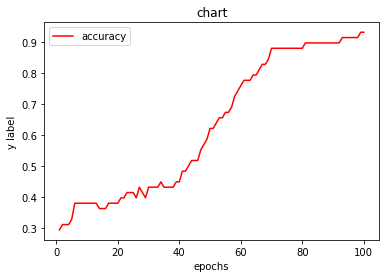

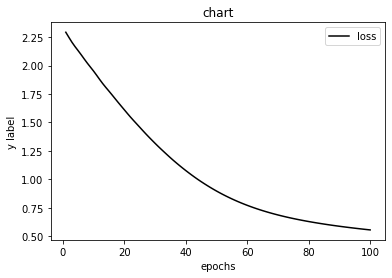

In [10]:
lss = []
acc = []
epochs = []
for epoch in range(100):
    epochs.append(epoch+1)
    ls = train();
    ac = test();
    l_tmp = ls.detach().numpy()
    lss.append(l_tmp)
    acc.append(ac);
    
plt.plot(epochs,acc,color='r',label='accuracy')  
plt.xlabel('epochs')    
plt.ylabel('y label')   
plt.title("chart")      
plt.legend()   
plt.show()

plt.plot(epochs,lss,color=(0,0,0),label='loss')
plt.xlabel('epochs')    
plt.ylabel('y label')   
plt.title("chart")      
plt.legend()            
plt.show()